#### 분류(Classification)
- 머신러닝의 지도학습에 대표적인 유형 중 하나는 분류(Classification)
- 분류는 주어진 데이터를 클래스 별로 구별해 내는 과정으로 다양한 분류 알고리즘을 통해 데이터와 데이터의 레이블 값을 학습시키고 모델을 생성
- 데이터가 주어졌을 때 학습된 모델을 통해 어느 범주에 속한 데이터인지 판단하고 예측

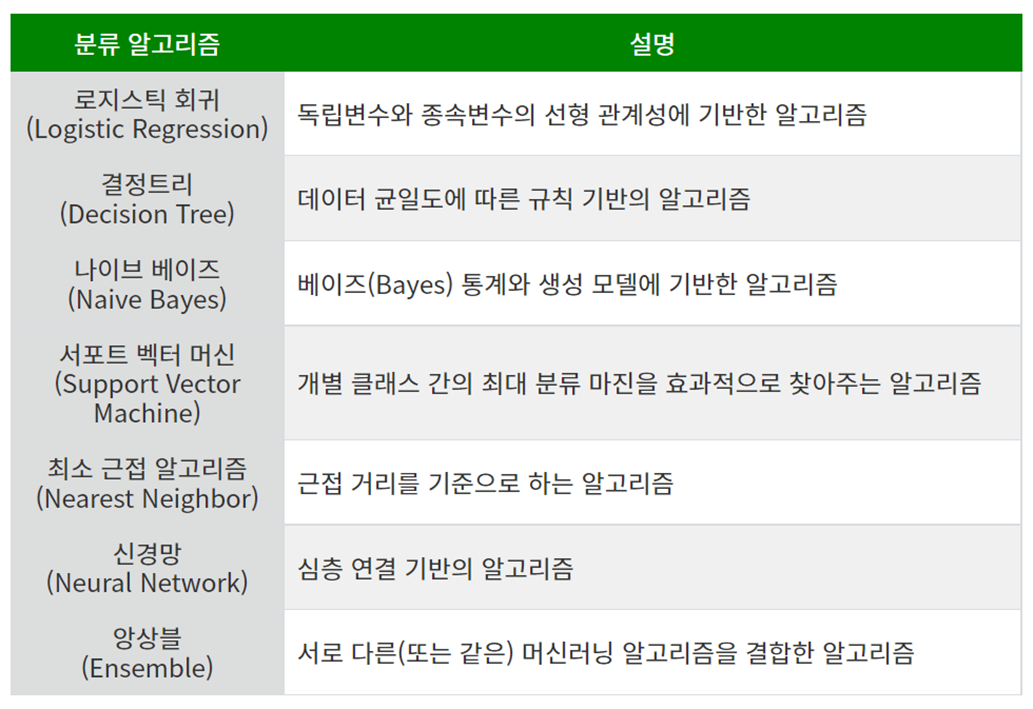

##### K-최근접 이웃(KNN : k-nearest neighbor)
- 가장 간단한 머신러닝 알고리즘, 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정하에 사용
- 다양한 레이블의 데이터 중에서, 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식
- 훈련데이터를 저장해 두는 것이 모델을 만드는 과정의 전부임
- 거리기반 분류분석 모델
- 거리 측정 방법(유클리드 거리(Euclidean Distance)/맨해튼 거리(Manhattan Distance))



- 유클리드 거리(Euclidean Distance)
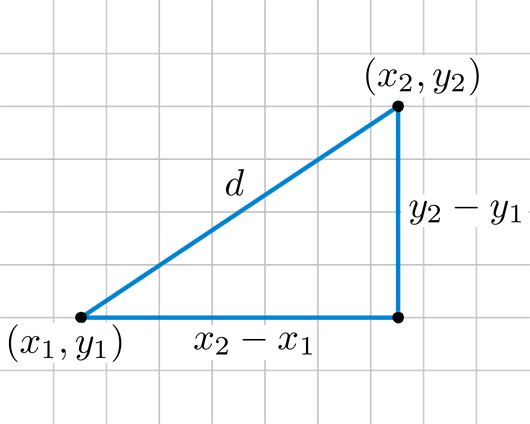
- 계산 공식
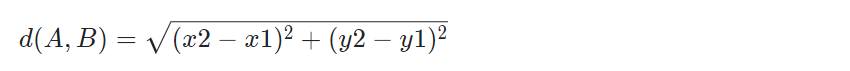

- 맨해튼 거리(Manhattan Distance)
    - K-NN 알고리즘 내부의 거리 측정 방법으로 흔히 사용
- 계산공식
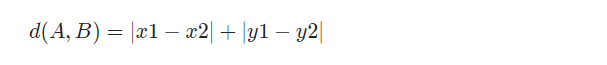

- 알고리즘 구현
    - 데이터: https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] 
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

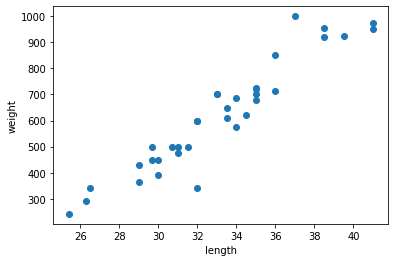

In [4]:
import matplotlib.pyplot as plt 

plt.scatter(bream_length, bream_weight) 
plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

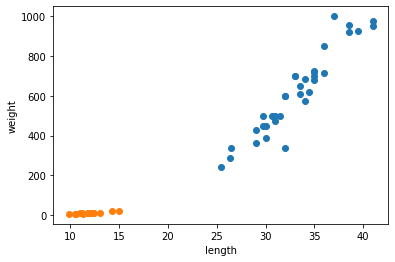

In [6]:
import matplotlib.pyplot as plt 

plt.scatter(bream_length, bream_weight) 
plt.scatter(smelt_length, smelt_weight) 
plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

In [10]:
# 도미/빙어 데이터 합치기
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

# 2차원 리스트로 변경
#fish_data=[]
#for l, w in zip(length, weight):
#    fish_data.append([l, w])

# zip(): 나열된 리스트 각각에서 원소를 하나씩 꺼내 반환
fish_data=[[l,w] for l,w in zip(length, weight)]

print(fish_data) # 변수 데이터(x)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
# 레이블 데이터(y): 도미=>1, 빙어=>0
fish_target=[1]*len(bream_length)+[0]*len(smelt_length)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [1]:
# KNN 모델 적용
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

NameError: ignored

In [26]:
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(fish_data,fish_target)

kn.score(fish_data, fish_target)

1.0

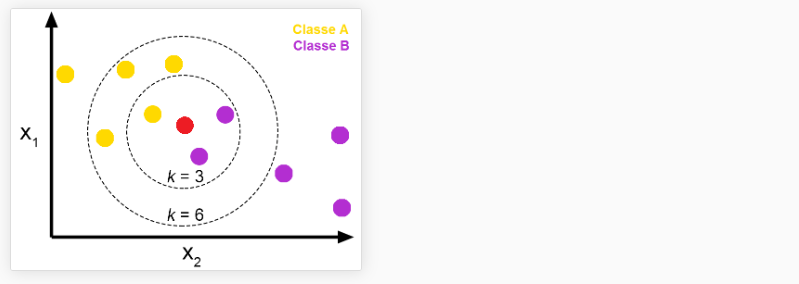

In [19]:
len(bream_length)/49

0.7142857142857143

In [28]:
fish=kn.predict([[9.2,8.6]]) # 가상의 데이터 확인
if fish == 1:
  print(f'예측값:{fish}.도미')
else:
  print(f'예측값:{fish}.빙어')

예측값:[0].빙어


#### 결정트리(Decision Tree, 의사결정트리, 의사결정나무)-p185~
- 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델
- 특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델

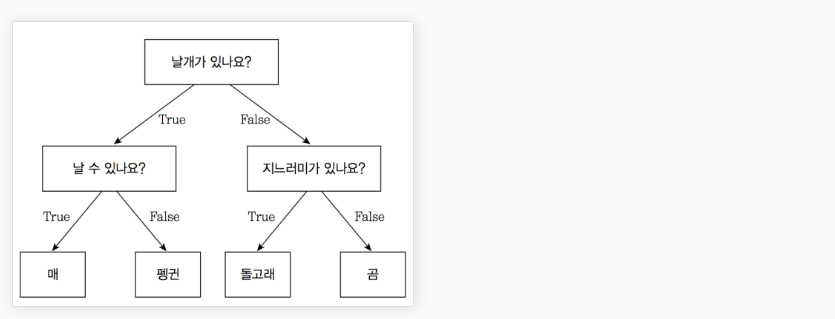

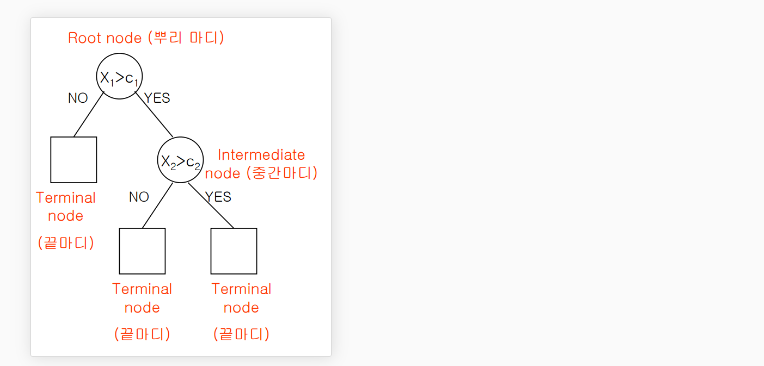

In [38]:
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# 데이터 로드
irsi_data=load_iris()
irsi_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
#irsi_data['target_names']
iris_df=pd.DataFrame(irsi_data['data'], columns=irsi_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
x_train, x_test, y_train, y_test = train_test_split(irsi_data.data, irsi_data.target,
                                                  test_size=0.2, random_state=11)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(y_test)

(120, 4) (30, 4)
(120,) (30,)
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [14]:
dtc_tree=DecisionTreeClassifier(random_state=0)
dtc_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# x_test를 이용해 예측
pred=dtc_tree.predict(x_test)
print('정답', y_test)
print('예측', pred)

정답 [2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
예측 [2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [17]:
scr_train=dtc_tree.score(x_train, y_train)
scr_test=dtc_tree.score(x_test, y_test)
print(scr_train,'\n', scr_test)

1.0 
 0.9333333333333333


In [19]:
accuracy_score(y_test,pred)

0.9333333333333333

- 결정트리 모델 시각화

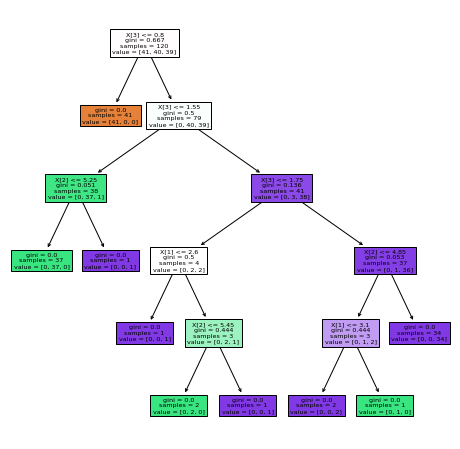

In [26]:
plt.figure(figsize=(8,8))
plot_tree(dtc_tree, filled=True, impurity=True)
plt.show()

- 지니계수 계산공식
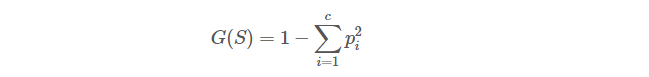

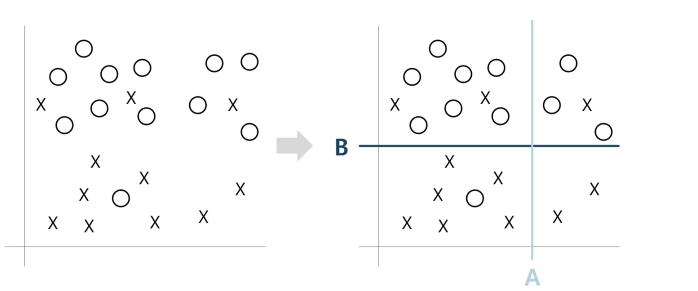

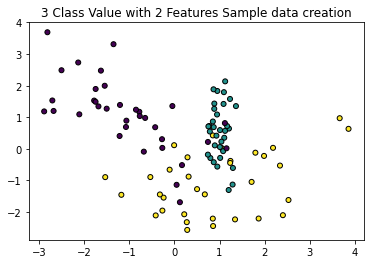

In [27]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class Value with 2 Features Sample data creation")
X_feature, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_feature[:,0], X_feature[:,1], marker='o', c=y_labels, s=25, edgecolors='k')
plt.show()

In [29]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 . test
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap='rainbow' ,zorder=1)

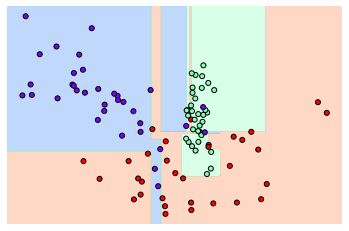

In [30]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf =DecisionTreeClassifier().fit(X_feature, y_labels)

visualize_boundary(dt_clf, X_feature, y_labels)
plt.show()

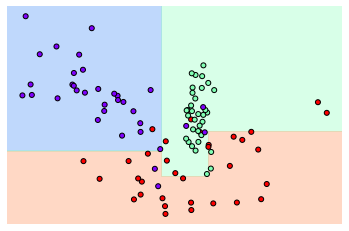

In [36]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_feature, y_labels)
dt_clf.fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)
plt.show()